In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense
import researchpy as rp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

Couldn't import dot_parser, loading of dot files will not be possible.


# Data Cleaning

## Manipulating Excel File

Selecionando as colunas de interesse no dataframe com os resultados

In [52]:
df= pd.read_excel('Amostra_Final.xlsx', sheet_name= "Amostra")
df_turno = df[['Unidade Ensino','Turno','Matriculas equivalentes educacao presencial']]
df_nivel = df[['Unidade Ensino','Tipo de Curso  ','Matriculas equivalentes educacao presencial']]
df_eixo = df[['Unidade Ensino','Eixo Tecnológico','Matriculas equivalentes educacao presencial']]

Plotando boxplot para quantidade de alunos por Turno e por Tipo de curso

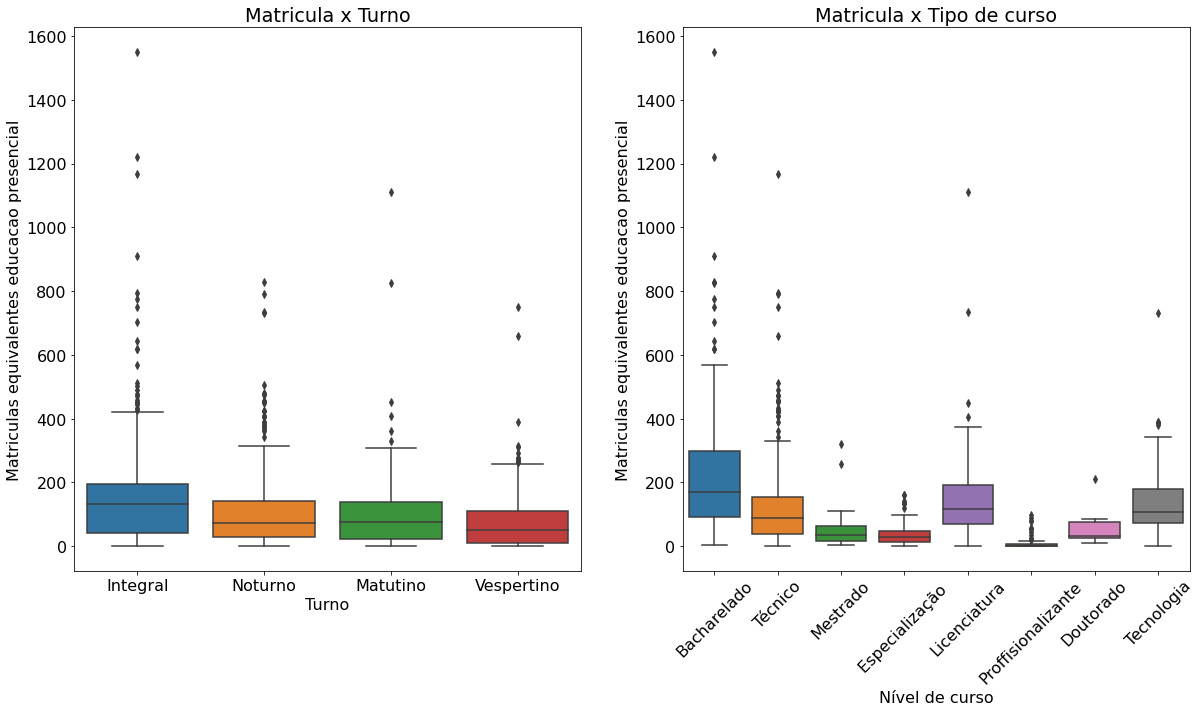

In [37]:
fig, ax= plt.subplots(1,2)
fig.set_size_inches(20,10)

sns.boxplot(ax = ax[0],data = df_turno, x = 'Turno', y = 'Matriculas equivalentes educacao presencial')
sns.boxplot(ax = ax[1],data = df_nivel, x = 'Tipo de Curso  ', y = 'Matriculas equivalentes educacao presencial')
ax[0].set_title('Matricula x Turno')
ax[1].set_title('Matricula x Tipo de curso')
ax[0].set_xlabel('Turno')
ax[1].set_xlabel('Nível de curso')
plt.rcParams['font.size'] = '16'
plt.xticks(rotation = 45)
plt.savefig('Boxplot matriculas', bbox_inches = 'tight')

Plotando um boxplot de quantidade de alunos por eixo tecnológico

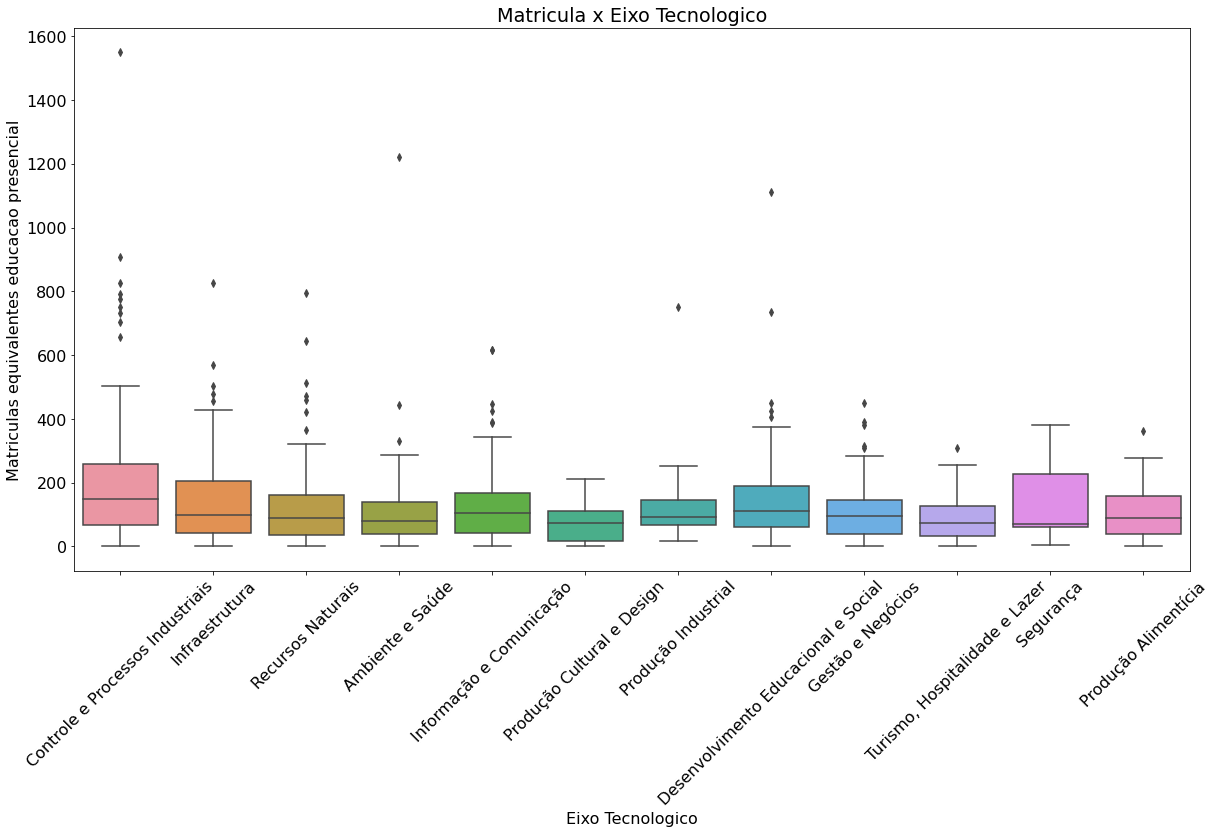

In [41]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 45)
fig = sns.boxplot(data = df_eixo, x = 'Eixo Tecnologico', y = 'Matriculas equivalentes educacao presencial')
fig.set_title('Matricula x Eixo Tecnologico')
plt.rcParams['font.size'] = '16'
plt.savefig('Boxplot eixos', bbox_inches = 'tight')


In [53]:
df= pd.read_excel('Amostra_Final.xlsx', sheet_name= "Amostra_agrupada")


Manipulando os dados para pegar somente os valores unicos de consumo de energia e unidade de ensino

In [54]:
df_consumo = df[['Unidade Ensino','Consumo de energia 2019']].drop_duplicates()
df_consumo_aluno = df[['Unidade Ensino','Consumo / Aluno 2019']].dropna()

Histograma do consumo do ano de 2019

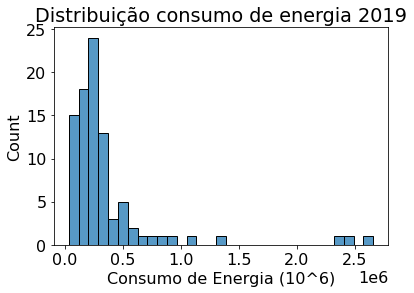

In [46]:
fig = sns.histplot(data= df_consumo, x = 'Consumo de energia 2019')
fig.set_title('Distribuição consumo de energia 2019')
fig.set_xlabel("Consumo de Energia (10^6)")
plt.savefig('Distribuição consumo', bbox_inches = 'tight')

Histograma do consumo de energia por aluno em 2019

In [ ]:
df_consumo_aluno

In [ ]:
fig = sns.histplot(data= df_consumo_aluno, x = 'Consumo / Aluno 2019')
fig.set_title('Consumo por aluno 2019')
fig.set_xlabel('Consumo por aluno em kWh')
plt.savefig('Consumo por aluno', bbox_inches = 'tight')

## Regressões

In [375]:
import statsmodels.api as sm

In [376]:
df_agrupada= pd.read_excel('Amostra_Final.xlsx', sheet_name='Amostra_agrupada')

In [377]:
cols = ['matriculas noturno','matriculas matutino','matriculas integral','matriculas vespertino','Matricula por nivel técnico',
'Matricula por Bacharelado','Matrícula por Pós Mestrado','Matrícula por Pós Doutorado','Matrícula por tecnologia', 'Matrícula por Especialização', 'Matrícula por licenciatura','Matricula Total por unidade','Professores','Servidores','Total de pessoas']

In [442]:
def regressao(series):
    y = df_agrupada['Consumo / pessoa 2019']

    x = sm.add_constant(series)
    model = sm.OLS(y,x)
    results = model.fit()
    results.params
    t_test = results.t_test([1, 0])
    return results

In [ ]:
for col in cols:
    results = regressao(df_agrupada[col])
    t_test = results.t_test([1, 0])
    print(f'O resultado do t_test da {col} é {t_test}')

## Treino

## Dataframe sem considerar o clima

In [ ]:
dataframe = pd.read_excel('Amostra_Final.xlsx', sheet_name='Amostra_agrupada')
features = dataframe.iloc[:,5:17].copy()
features.head()

In [428]:
quantitative = ['matriculas noturno','matriculas matutino','matriculas integral','matriculas vespertino','Matrícula por Pós Mestrado','Matrícula por Pós Doutorado', 'Matrícula por tecnologia', 'Matrícula por Especialização', 'Matrícula por licenciatura',
'Matricula por nivel técnico', 'Matricula por Bacharelado', 'Matrícula por profissionalizante' ]

In [354]:
quantitative = ['matriculas noturno','matriculas matutino','matriculas integral','matriculas vespertino','Matricula Total por unidade','Professores','Servidores','Total de pessoas']

In [338]:
quantitative = ['matriculas noturno','matriculas matutino','matriculas integral','matriculas vespertino','Matricula por nivel técnico',
'Matricula por Bacharelado','Matrícula por Pós Mestrado','Matrícula por Pós Doutorado','Matrícula por tecnologia', 'Matrícula por Especialização', 'Matrícula por licenciatura','Matricula Total por unidade','Professores','Servidores','Total de pessoas']

## Treinamento considerando o clima


In [444]:
dataframe = pd.read_excel('Amostra_Final.xlsx', sheet_name='Amostra Clima')
features = dataframe.iloc[:,1:10].copy()
features.head()

,GHR,matriculas noturno,matriculas matutino,matriculas integral,matriculas vespertino,Matricula Total por unidade,Professores,Servidores,Total de pessoas
0,17608,488.39,28.97,767.49,0.0,1284.85,81,45,1410.85
1,31877,479.57,0.00,418.30,0.0,897.87,62,23,982.87
2,35093,303.72,0.00,676.98,0.0,980.70,66,24,1070.70
3,16253,576.36,0.00,443.69,0.0,1020.05,58,24,1102.05
4,23883,3042.24,0.00,6407.42,16.7,9466.36,561,413,10440.36


In [445]:
quantitative = ['GHR','matriculas noturno','matriculas matutino','matriculas integral','matriculas vespertino', 'Matricula Total por unidade','Professores','Servidores','Total de pessoas']

In [195]:
def z_score_normalize(series):
  mean = series.mean()
  std_dv = series.std()
  return series.apply(lambda x:(x - mean) / std_dv)

In [500]:
for col in quantitative:
  features[col] = z_score_normalize(features[col])
features.head(10)
#features.hist(bins=20, figsize=(18, 12), xlabelsize=10)

,GHR,matriculas noturno,matriculas matutino,matriculas integral,matriculas vespertino,Matricula Total por unidade,Professores,Servidores,Total de pessoas
0,-1.104074,0.010335,-0.327008,-0.063665,-0.439817,-0.255306,-0.161943,-0.200632,-0.251070
1,-0.488945,-0.002175,-0.387519,-0.361157,-0.439817,-0.430850,-0.327005,-0.527277,-0.431673
2,-0.350305,-0.251582,-0.387519,-0.140775,-0.439817,-0.393276,-0.292255,-0.512430,-0.394610
3,-1.162487,0.135102,-0.387519,-0.339526,-0.439817,-0.375426,-0.361754,-0.512430,-0.381380
4,-0.833562,3.632453,-0.387519,4.741265,-0.398121,3.456033,4.008035,5.263253,3.559290
5,0.077470,1.768087,3.436257,2.351669,4.589914,3.324060,2.956853,0.749609,3.257175
6,0.425191,-0.682348,-0.342820,-0.482866,-0.317799,-0.681324,-0.596316,-0.467887,-0.676072
7,-0.490368,-0.122560,-0.102595,-0.321882,-0.439817,-0.386563,-0.500754,-0.556972,-0.399758
8,1.511376,-0.558828,-0.387519,-0.534614,-0.437320,-0.700793,-0.639753,-0.720295,-0.703468
9,1.473052,-0.413141,-0.387519,-0.207576,-0.439817,-0.480517,-0.526816,-0.304564,-0.481252


In [501]:
#loc variables in dataframe
X = features

In [502]:
#loc outputs in dataframe
#separar os dados de "saída"
y = dataframe.loc[:, ['Consumo / pessoa 2019']].copy()
y = np.ravel(y)

In [495]:
y

array([113.97526314, 229.32839541, 217.56234239, 179.50183748,
       236.81175745, 244.4052762 , 122.86046915,  66.18750118,
       360.69836772, 326.78592064, 514.38581688, 301.30411432,
       241.79873083, 196.4209272 , 404.64461708, 293.25861452,
       123.47390284, 264.84388112, 107.58047767, 246.16612372,
       510.68104616, 106.48322073, 172.43778608, 225.72963361,
       252.81613795, 204.03443402, 219.72373378, 301.47792766,
       202.31604362,  79.70929694, 159.78831747, 152.27080929,
       239.63963351, 171.97531111,  76.03259107, 117.37962045,
       223.88585058, 118.66256114, 243.91445984])

In [503]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.hist(bins=20, figsize=(18, 12), xlabelsize=10)

In [ ]:
X_test.hist(bins=20, figsize=(18, 12), xlabelsize=10)

# Random Forest Sci-Kit

In [506]:
from sklearn.ensemble import RandomForestRegressor

#Prameter grid to search best parameters to ANN run
param_grid = [
    {'n_estimators': [10,12,15,20,25],
    'max_features': [1,0.3, 'log2', 'sqrt'],
    'max_depth':[10,12,15,20,25]}
]

regr_rf = RandomForestRegressor()

grid_reg_rf = GridSearchCV(estimator=regr_rf, param_grid=param_grid, n_jobs=5)
grid_reg_rf.fit(X_train, y_train)

grid_reg_rf.best_params_
grid_reg_rf.best_score_
best_rf = grid_reg_rf.best_estimator_

grid_reg_rf.best_estimator_

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=12)

In [507]:
print("The R² on training set: {:.4f}".format(r2_score(y_train, best_rf.predict(X_train))))
print("The R² on test set: {:.4f}".format(r2_score(y_test, best_rf.predict(X_test))))

rmse = (mean_squared_error(y_train, best_rf.predict(X_train)))**(1/2)
print("The RMSE on training set: {:.4f}".format(rmse))
rmse = (mean_squared_error(y_test, best_rf.predict(X_test)))**(1/2)
print("The RMSE on test set: {:.4f}".format(rmse))

mae = mean_absolute_error(y_train, best_rf.predict(X_train))
print("The mean absolute error (MAE) on training set: {:.4f}".format(mae))
mae = mean_absolute_error(y_test, best_rf.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

The R² on training set: 0.8554
The R² on test set: -2.3243
The RMSE on training set: 42.8661
The RMSE on test set: 93.0639
The mean absolute error (MAE) on training set: 29.7273
The mean absolute error (MAE) on test set: 72.0737


## XGboost

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

In [509]:
#Prameter grid to search best parameters to ANN run
param_grid = [
    {'n_estimators': [5,10,15,20],
    'max_features': [1,0.3,'log2','sqrt'],
    'max_depth':[2,5,10,15,20]}
]

regr_xgb = GradientBoostingRegressor()

grid_reg_xgb = GridSearchCV(estimator=regr_xgb, param_grid=param_grid, n_jobs=5)
grid_reg_xgb.fit(X_train, y_train)

grid_reg_xgb.best_params_
grid_reg_xgb.best_score_
best_xgb = grid_reg_xgb.best_estimator_

grid_reg_xgb.best_estimator_

GradientBoostingRegressor(max_depth=5, max_features=0.3, n_estimators=20)

In [510]:
print("The R² on training set: {:.4f}".format(r2_score(y_train, best_xgb.predict(X_train))))
print("The R² on test set: {:.4f}".format(r2_score(y_test, best_xgb.predict(X_test))))

rmse = (mean_squared_error(y_train, best_xgb.predict(X_train)))**(1/2)
print("The RMSE on training set: {:.4f}".format(rmse))
rmse = (mean_squared_error(y_test, best_xgb.predict(X_test)))**(1/2)
print("The RMSE on test set: {:.4f}".format(rmse))

mae = mean_absolute_error(y_train, best_xgb.predict(X_train))
print("The mean absolute error (MAE) on training set: {:.4f}".format(mae))
mae = mean_absolute_error(y_test, best_xgb.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

The R² on training set: 0.9801
The R² on test set: -1.6207
The RMSE on training set: 15.9121
The RMSE on test set: 82.6308
The mean absolute error (MAE) on training set: 12.7957
The mean absolute error (MAE) on test set: 62.0905


# Sharp Values

In [365]:
import shap

In [366]:
shap.initjs()

### RF sharp values

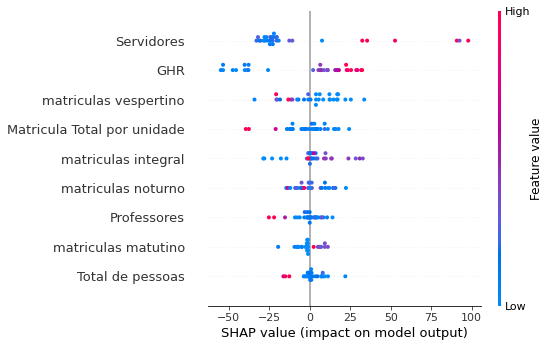

In [494]:
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_train)
i = 4776
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

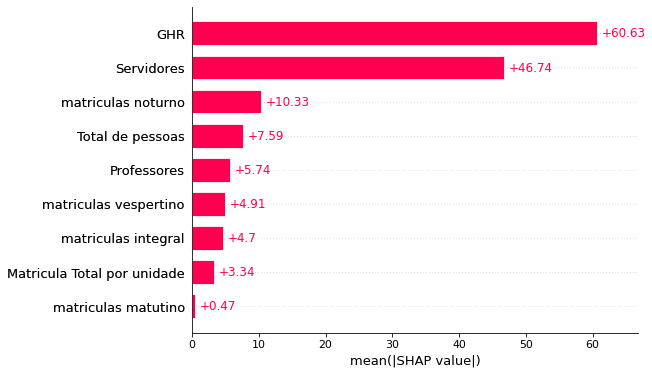

In [508]:
explainer = shap.Explainer(best_rf.predict, X_test)
shap_values = explainer(X_test)
plt.figure(figsize=(20,10))
fig = shap.plots.bar(shap_values, show=False)
plt.savefig('Sharp RF clima',bbox_inches = 'tight')

### XGBoost sharp values

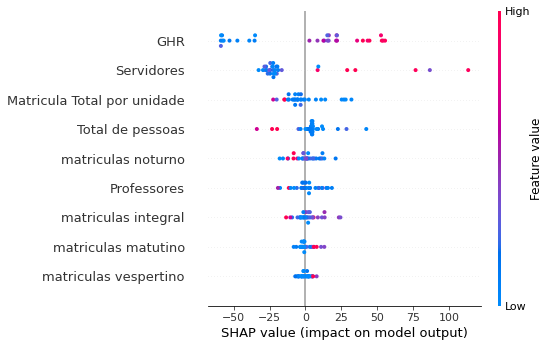

In [493]:
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_train)
i = 4776
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

In [ ]:
explainer = shap.Explainer(best_xgb.predict, X_test)
shap_values = explainer(X_test)
plt.figure(figsize=(20,10))
fig = shap.plots.bar(shap_values, show=False)
plt.savefig('sharp xgboost clima',bbox_inches = 'tight')